In [27]:
from tqdm.auto import tqdm
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn import metrics

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive

# Mounting Drive inside the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Julian_TOTAL-klassifiziert.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Marek_klassifiziert.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Reddit_Yonas_Total_Klassifiziert.csv")



In [63]:
Atweets = pd.concat([df1, df2, df3], axis=0, join='inner')
Atweets = Atweets.sort_values(by='index')
Atweets = Atweets.reset_index(drop=True)

Punktuierung

In [64]:
def remove_punctuation(txt):
    txt_nopunt = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunt

In [65]:
Atweets["submission"] = Atweets["submission"].apply(lambda x: remove_punctuation(x))

Tokenisierung

In [66]:
def tokenize(txt):
    tokens = re.split("\W+", txt)
    return tokens

In [67]:
Atweets["submissions_tokenized"] = Atweets["submission"].apply(lambda x: tokenize(x.lower()))

Stopwörter

In [68]:
stopwords = nltk.corpus.stopwords.words("english")

In [69]:
stopwords.append("ll")
stopwords.append("im")
stopwords.append("youre")
stopwords.append("youve")
stopwords.append("youll")
stopwords.append("youd")
stopwords.append("shes")
stopwords.append("its")
stopwords.append("thatll")
stopwords.append("dont")
stopwords.append("shouldve")
stopwords.append("arent")
stopwords.append("couldnt")
stopwords.append("didnt")
stopwords.append("doesnt")
stopwords.append("hadnt")
stopwords.append("havent")
stopwords.append("isnt")
stopwords.append("mightnt")
stopwords.append("neednt")
stopwords.append("shant")
stopwords.append("shouldnt")
stopwords.append("wasnt")
stopwords.append("werent")
stopwords.append("wont")
stopwords.append("wouldnt")

In [70]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [71]:
Atweets["submission_no_stopwords"] = Atweets["submissions_tokenized"].apply(lambda x: remove_stopwords(x))

Stemming

In [72]:
ps = PorterStemmer()

In [73]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [74]:
Atweets["submission_stemmed"] = Atweets["submission_no_stopwords"].apply(lambda x: stemming(x))

Lemmatisierung

In [75]:
wn = nltk.WordNetLemmatizer()

In [76]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [77]:
Atweets["submission_lemmatized"] = Atweets["submission_no_stopwords"].apply(lambda x: lemmatization(x))

Train und Test-Set

In [111]:
Atweets["submission_cleaned"] = " "

for i in range(0, len(Atweets) - 1):
  Atweets.loc[i,"submission_cleaned"] = " ".join(Atweets.loc[i,"submission_stemmed"])

In [112]:
Atweets

,index,submission,sentiment,submissions_tokenized,submission_no_stopwords,submission_stemmed,submission_lemmatized,submission_cleaned
0,0,I see that many countries are working hard to ...,2,"[i, see, that, many, countries, are, working, ...","[see, many, countries, working, hard, publish,...","[see, mani, countri, work, hard, publish, news...","[see, many, country, working, hard, publish, n...",see mani countri work hard publish news spread...
1,0,httpwwwtheguardiancomtechnology2013oct29bitcoi...,3,[httpwwwtheguardiancomtechnology2013oct29bitco...,[httpwwwtheguardiancomtechnology2013oct29bitco...,[httpwwwtheguardiancomtechnology2013oct29bitco...,[httpwwwtheguardiancomtechnology2013oct29bitco...,httpwwwtheguardiancomtechnology2013oct29bitcoi...
2,1,Because I see a lot of down and out people who...,2,"[because, i, see, a, lot, of, down, and, out, ...","[see, lot, people, fucked, loanswhat, think, r...","[see, lot, peopl, fuck, loanswhat, think, rain...","[see, lot, people, fucked, loanswhat, think, r...",see lot peopl fuck loanswhat think rain change...
3,1,so like many im not 100 clear on how LN functi...,3,"[so, like, many, im, not, 100, clear, on, how,...","[like, many, 100, clear, ln, functions, granul...","[like, mani, 100, clear, ln, function, granula...","[like, many, 100, clear, ln, function, granula...",like mani 100 clear ln function granular level...
4,2,Think i missed the Bottom what about you\r\n\...,3,"[think, i, missed, the, bottom, what, about, y...","[think, missed, bottom, edit, damn, autocorrec...","[think, miss, bottom, edit, damn, autocorrect,...","[think, missed, bottom, edit, damn, autocorrec...",think miss bottom edit damn autocorrect buy
...,...,...,...,...,...,...,...,...
2998,2594,I know there are a lot of walk throughs about ...,3,"[i, know, there, are, a, lot, of, walk, throug...","[know, lot, walk, throughs, getting, private, ...","[know, lot, walk, through, get, privat, key, s...","[know, lot, walk, throughs, getting, private, ...",know lot walk through get privat key schildbac...
2999,2595,how is a cryptocurrency exchange different tha...,3,"[how, is, a, cryptocurrency, exchange, differe...","[cryptocurrency, exchange, different, bank, le...","[cryptocurr, exchang, differ, bank, less, prof...","[cryptocurrency, exchange, different, bank, le...",cryptocurr exchang differ bank less profit own...
3000,2596,A US federal judge rejected Alibaba Group Hold...,3,"[a, us, federal, judge, rejected, alibaba, gro...","[us, federal, judge, rejected, alibaba, group,...","[us, feder, judg, reject, alibaba, group, hold...","[u, federal, judge, rejected, alibaba, group, ...",us feder judg reject alibaba group hold ltd mo...
3001,2597,Anyone know of any Also do most online shops a...,3,"[anyone, know, of, any, also, do, most, online...","[anyone, know, also, online, shops, accept, lo...","[anyon, know, also, onlin, shop, accept, lot, ...","[anyone, know, also, online, shop, accept, lot...",anyon know also onlin shop accept lot previou ...


In [113]:
Corpus = Atweets.loc[:, "submission_cleaned"].values

In [114]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus,Atweets['sentiment'],test_size=0.2)

In [115]:
Train_Y_1 = Train_Y
Test_Y_1 = Test_Y

Train_Y_2 = Train_Y
Test_Y_2 = Test_Y

Train_Y_1 = np.where(Train_Y_1 == 1.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 2.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 3.0, 1, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 4.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 5.0, 0, Train_Y_1)

Train_Y_2 = np.where(Train_Y_2 == 1.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 2.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 3.0, 2, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 4.0, 3, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 5.0, 3, Train_Y_2)


Test_Y_1 = np.where(Test_Y_1 == 1.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 2.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 3.0, 1, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 4.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 5.0, 0, Test_Y_1)

Test_Y_2 = np.where(Test_Y_2 == 1.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 2.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 3.0, 2, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 4.0, 3, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 5.0, 3, Test_Y_2)

In [116]:
Tfidf_vect = TfidfVectorizer(max_features=12842)
Tfidf_vect.fit(Corpus)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

Naive Bayes

In [117]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_2)*100)

Naive Bayes Accuracy Score ->  76.70549084858568


Precision, recall, fscore

In [118]:
precision_recall_fscore_support(predictions_NB, Test_Y_2, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 0.7670549084858569, 0.8681732580037664, None)

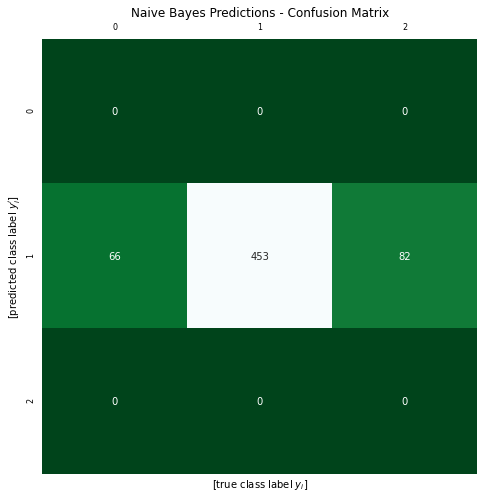

In [94]:
from sklearn.metrics import confusion_matrix
# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

SVM

In [121]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)

SVM Accuracy Score ->  76.87188019966722


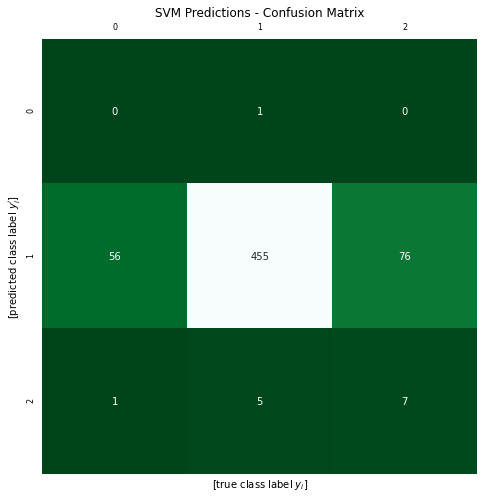

In [122]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

**Count Vectorizer**


In [123]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
vectorizer = CountVectorizer(min_df = 0.05, stop_words='english', ngram_range = (1,1))
X = vectorizer.fit_transform(Corpus)

X = X.toarray()

In [124]:
from sklearn.svm import SVC
from sklearn import metrics

# Creating an obect containing parametrisation setup for SVM 
svm = SVC(kernel='poly', degree = 2, C=100, random_state=1234)

vectorizer.fit(Corpus)
Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

# Training an SVM model with parameters set in the previous  step
svm.fit(Train_X_count, Train_Y_2)

# Calculating model predictions on evaluation data
y_pred = svm.predict(Test_X_count)

# Accuracy on evaluation data
eval_accuracy = metrics.accuracy_score(Test_Y_2, y_pred) * 100
print(f'Model classification accuracy: {eval_accuracy:.2f}%')

Model classification accuracy: 70.05%


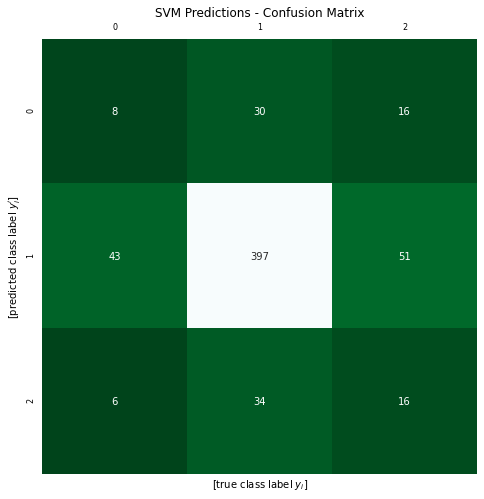

In [125]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, y_pred)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

**Hierarchical classification**

In [126]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_1)*100)

Naive Bayes Accuracy Score ->  76.53910149750416


Precision, recall, fscore

In [127]:
precision_recall_fscore_support(predictions_NB, Test_Y_1, average='weighted')

(0.9961705184056941, 0.7653910149750417, 0.8656637304147503, None)

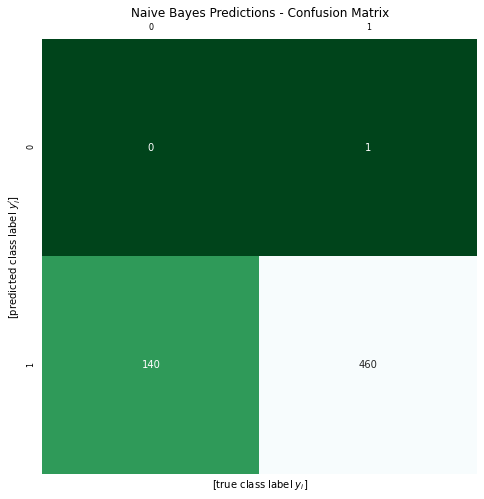

In [128]:
from sklearn.metrics import confusion_matrix
# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

In [157]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_1 = SVC(C=100, kernel='linear', degree=3, gamma='auto')
SVM_hierarchical_1.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_1.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_1)*100)

SVM Accuracy Score ->  72.21297836938436


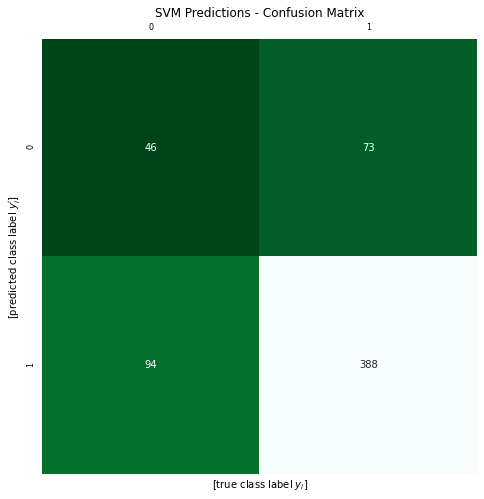

In [158]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

In [170]:
indices_train = Train_Y_2 != 2
indices_test = Test_Y_2 != 2

In [172]:
print(Train_X)
indices_train


['bitcoin use qr code also could use 34 letter code transfer bitcoin onlin wallet thank advanc'
 'httpshopaqtivaquacomhttpshopaqtivaquacom recent discov bitcoin setup websit accept bitcoin order enjoy swim'
 'hi 60 bitcoin realli want wonder anyon would like purchas paypal venmo will use middleman long theyr trust interest discord peyton0177 feel free messag thank'
 ...
 'read articl say novemb 2008 paper post internet name satoshi nakamoto titl bitcoin internet post first peopl find paper'
 'thing upcom holiday basic like flash drive could swipe spend'
 'look buy bitcoin notic current 42 differ buy sell price coinbas someth bitcoin coinbas tri make extra money']


array([False,  True, False, ..., False, False,  True])

In [174]:
Train_Y_2 = Train_Y_2[indices_train]
Train_X = Train_X[indices_train]

Test_Y_2 = Test_Y_2[indices_test]
Test_X = Test_X[indices_test]

In [183]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_2 = SVC(C=1000, kernel='poly', degree=3, gamma='auto')

Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

SVM_hierarchical_2.fit(Train_X_count,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_2.predict(Test_X_count)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)

SVM Accuracy Score ->  53.57142857142857


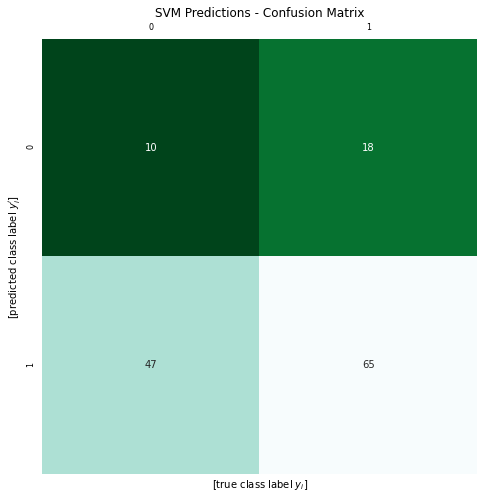

In [184]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');